### Idea:
##### The average trip duration of female is larger than that of female.
### Null Hypothesis:
##### The average trip duration of female is less or equal to that of male. Mean of Duration_female - Mean of Duration_male <= 0
### Alternatice Hypothesis:
##### The average trip duration of female is lower than that of male. Mean of Duration_female - Mean of Duration_male > 0
###### I will use a significance level $\alpha=0.05$,which means I want the probability of getting a result at least as significant as mine to be less then 5%

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import seaborn as sns
%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:

datestring = '201512'
getCitiBikeCSV(datestring)

file in place, you can continue


In [106]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460318 entries, 0 to 1460317
Data columns (total 15 columns):
tripduration               1460318 non-null int64
starttime                  1460318 non-null object
stoptime                   1460318 non-null object
start station id           1460318 non-null int64
start station name         1460318 non-null object
start station latitude     1460318 non-null float64
start station longitude    1460318 non-null float64
end station id             1460318 non-null int64
end station name           1460318 non-null object
end station latitude       1460318 non-null float64
end station longitude      1460318 non-null float64
bikeid                     1460318 non-null int64
usertype                   1460318 non-null object
birth year                 1265112 non-null float64
gender                     1460318 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 167.1+ MB


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1,2015-12-01 07:35:36
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1,2015-12-01 07:38:15
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1,2015-12-01 07:44:49
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1,2015-12-01 08:02:29
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1,2015-12-01 08:06:37


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [6]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [7]:
df.head()

,tripduration,gender,date
0,475,1,2015-12-01 07:35:36
1,684,1,2015-12-01 07:38:15
2,1063,1,2015-12-01 07:44:49
3,1075,1,2015-12-01 08:02:29
4,293,1,2015-12-01 08:06:37


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


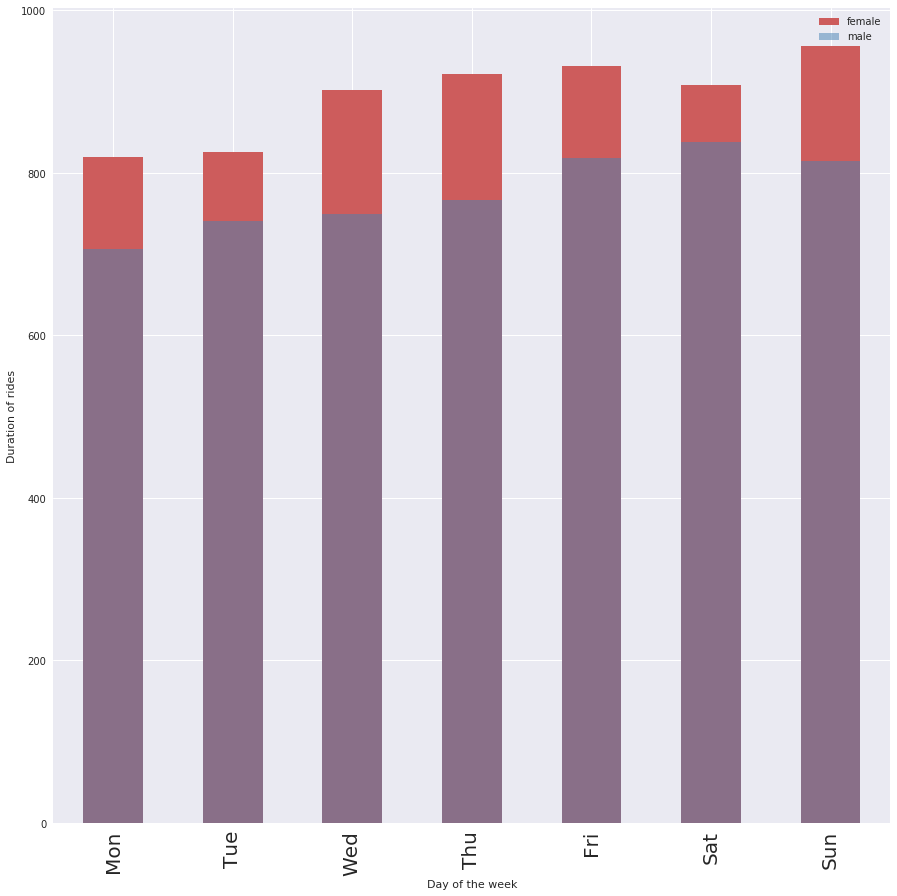

In [8]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['tripduration'][df['gender'] == 2].groupby([df['date'].dt.weekday]).agg(np.mean)) / norm_w).plot(kind="bar",color='IndianRed',label='female')

norm_m = 1
ax = ((df['tripduration'][df['gender'] == 1].groupby([df['date'].dt.weekday]).agg(np.mean)) / norm_m).plot(kind="bar",color='SteelBlue',alpha=0.5,label='male')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Duration of rides")
ax.set_xlabel ("Day of the week")
pl.legend()

Figure 1: This figure displays the mean of Citibike trip duration of female and male bikers in each of the week day in December 2015.

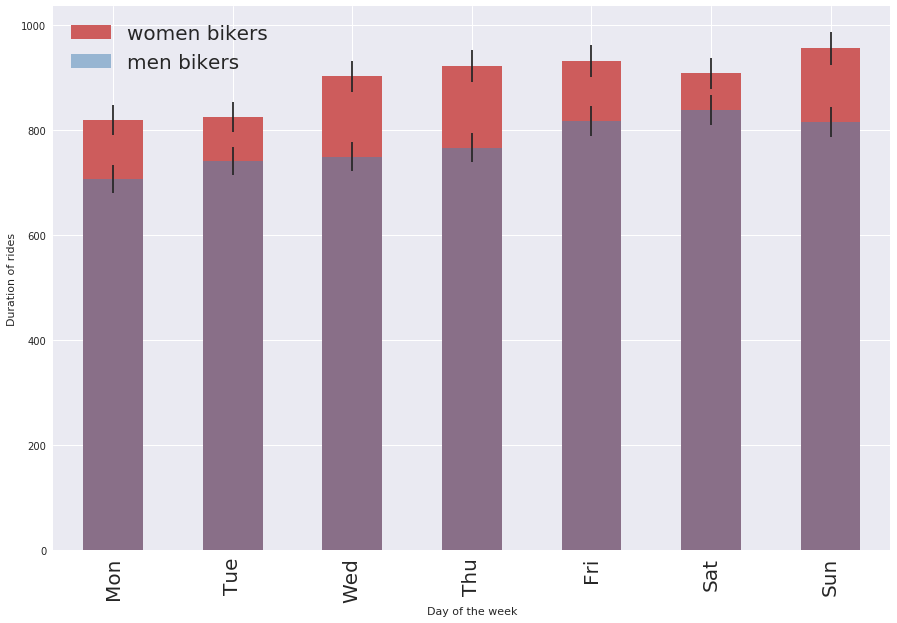

In [9]:
fig=pl.figure(figsize(15,10))

mean_w = df.tripduration[df.gender == 2].groupby([df.date.dt.weekday]).agg(np.mean)
norm_w = 1
error_w = np.sqrt(mean_w)
ax=((mean_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


mean_m = df.tripduration[df.gender==1].groupby([df.date.dt.weekday]).agg(np.mean)
norm_m = 1
error_m=np.sqrt(mean_m)
((mean_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='men bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Duration of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['women bikers','men bikers'],fontsize=20)

Figure 2: This figure displays the mean of Citibike trip duration of female and male bikers in each of the week day in December 2015 with the statistical error.

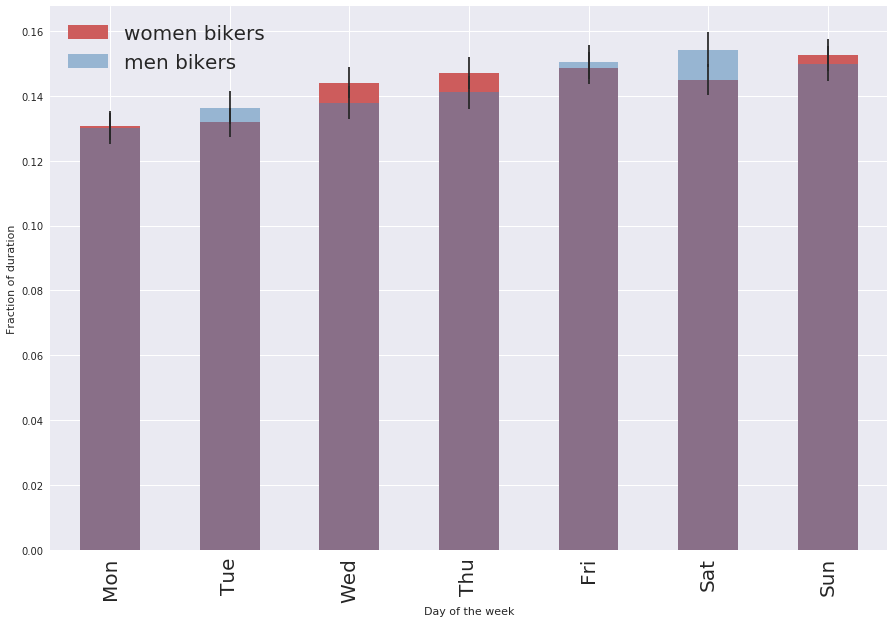

In [10]:
fig = pl.figure(figsize(15,10))

norm_w = mean_w.sum()
error_w = np.sqrt(mean_w)
((mean_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = mean_m.sum()
ax = ((mean_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='men bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of duration")
ax.set_xlabel ("Day of the week")

pl.legend(['women bikers','men bikers'],fontsize=20)

Distribution of Citibike trip duration by gender in December 2015, normalized

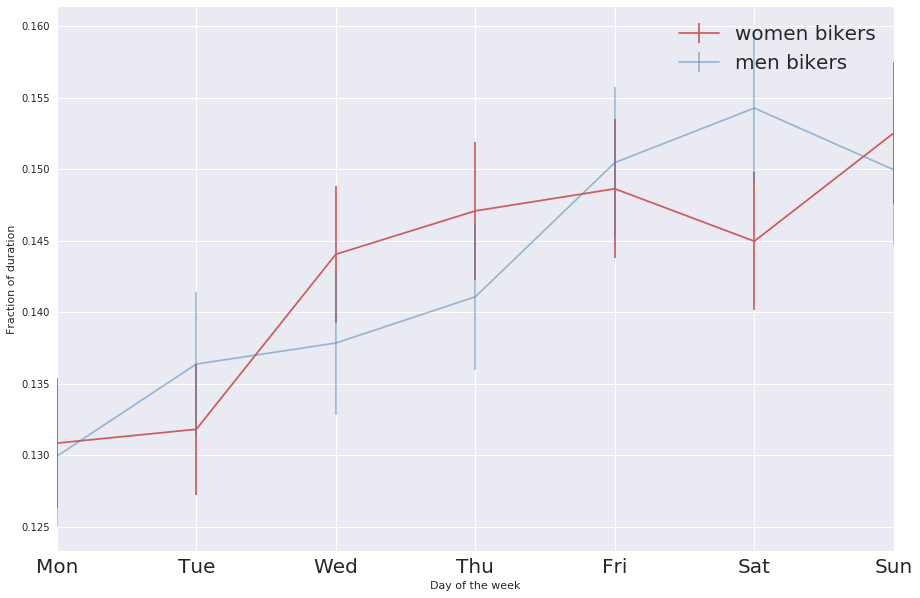

In [11]:
fig = pl.figure(figsize(15,10))

norm_w = mean_w.sum()
error_w = np.sqrt(mean_w)
((mean_w) / norm_w).plot(kind="line", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = mean_m.sum()
ax = ((mean_m) / norm_m).plot(kind="line", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='men bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of duration")
ax.set_xlabel ("Day of the week")

pl.legend(['women bikers','men bikers'],fontsize=20)

# T-Test for Differences in Two Sample Means
The idea was to compare the mean of two samples, and we can understand male and females are different populations, so I decide to use the 2 groups unpaired t test.

,tripduration,gender
0,1470,1
1,229,1
2,344,1
3,1120,1
4,229,1


In [33]:
def gender(x):
    if x == 1:
        return 'male'
    if x == 2:
        return 'female'
df_plot = df[df['gender'] != 0].copy()

In [40]:
df_plot['gender'] = df_plot['gender'].apply(lambda x: gender(x))    

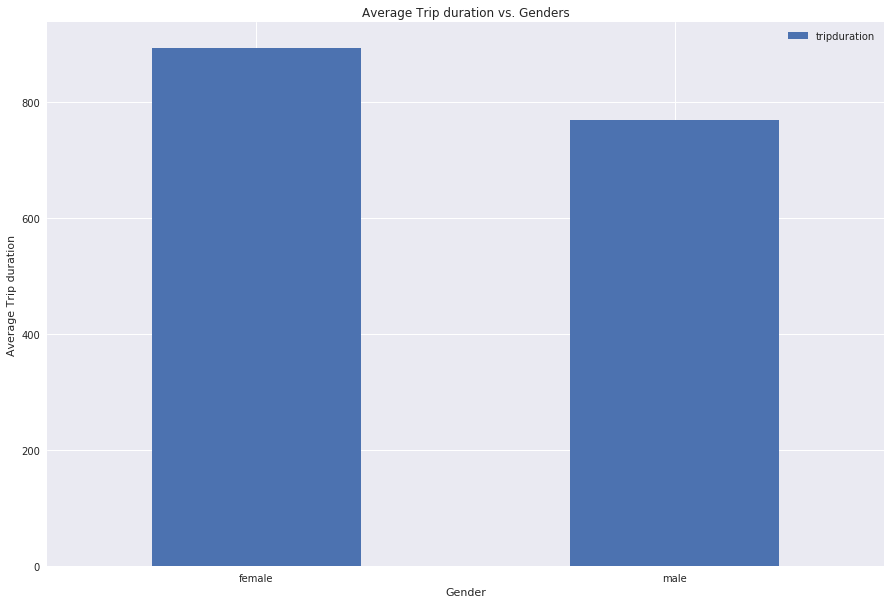

In [43]:
fig = plt.figure(figsize=(5,3))
# df_plot = df[df['gender'] != 0]['gender']
gender_tripduration = df_plot.groupby(['gender']).mean()
gender_tripduration.plot(kind='bar',rot=360)
plt.grid(b=True)
plt.xlabel('Gender')
plt.ylabel('Average Trip duration')
plt.title('Average Trip duration vs. Genders')

In [49]:
df.head()

,tripduration,gender,date
0,475,1,2015-12-01 07:35:36
1,684,1,2015-12-01 07:38:15
2,1063,1,2015-12-01 07:44:49
3,1075,1,2015-12-01 08:02:29
4,293,1,2015-12-01 08:06:37


In [51]:
df_male=df[df['gender']==1]
df_male.describe()

,tripduration,gender
count,5.682310e+05,568231.0
mean,7.694283e+02,1.0
std,7.461665e+03,0.0
min,6.100000e+01,1.0
25%,3.320000e+02,1.0
50%,5.230000e+02,1.0
75%,8.320000e+02,1.0
max,2.932878e+06,1.0


In [55]:
df_male = df_male[['tripduration']]

In [56]:
df_male.describe()

,tripduration
count,5.682310e+05
mean,7.694283e+02
std,7.461665e+03
min,6.100000e+01
25%,3.320000e+02
50%,5.230000e+02
75%,8.320000e+02
max,2.932878e+06


In [57]:
df_female=df[df['gender']==0][['tripduration']]
df_female.head()

,tripduration
24,224
73,1962
74,2154
91,1597
128,639


In [58]:
df_female.describe()

,tripduration
count,6.952600e+04
mean,2.513296e+03
std,2.194155e+04
min,6.100000e+01
25%,7.610000e+02
50%,1.242000e+03
75%,1.804000e+03
max,2.775247e+06


In [68]:
diff_female_male = df_female.tripduration.mean() - df_male.tripduration.mean()
if diff_female_male <= 0:
    print("We are done. Null hypothesis is true.")
else:
    print("We need to take a look at the statistical significance before we reject the null hypothesis.")

We need to take a look at the statistical significance before we reject the null hypothesis.


# T-test

In [69]:
from scipy import stats

In [72]:
stats.ttest_ind(df_female['tripduration'], df_male['tripduration'], equal_var = False)

Ttest_indResult(statistic=20.809848562537422, pvalue=6.7923715601893607e-96)

### interpretion
The T statistics for these two samples are 20.81, while the p-value is 6.7923715601893607e-96 which is actually 0 and p/2 is smaller than our significant level 0.05. The we can reject the null hypothese. The average trip duration of male is higher than than that of female.


# reproduce this study using a different month to check the robostness
###### use June 2016 to check the seasonality

In [73]:
datestring = '201606'
getCitiBikeCSV(datestring)
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

file in place, you can continue


In [108]:
df06=df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [109]:
df06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460318 entries, 0 to 1460317
Data columns (total 15 columns):
tripduration               1460318 non-null int64
starttime                  1460318 non-null object
stoptime                   1460318 non-null object
start station id           1460318 non-null int64
start station name         1460318 non-null object
start station latitude     1460318 non-null float64
start station longitude    1460318 non-null float64
end station id             1460318 non-null int64
end station name           1460318 non-null object
end station latitude       1460318 non-null float64
end station longitude      1460318 non-null float64
bikeid                     1460318 non-null int64
usertype                   1460318 non-null object
birth year                 1265112 non-null float64
gender                     1460318 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 167.1+ MB


In [90]:
df06.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [91]:
df06_plot = df06[df06['gender'] != 0].copy()

In [93]:
df06_plot['gender'] = df06_plot['gender'].apply(lambda x: gender(x))   

In [95]:
df06_plot.head()

,tripduration,gender
0,1470,male
1,229,male
2,344,male
3,1120,male
4,229,male


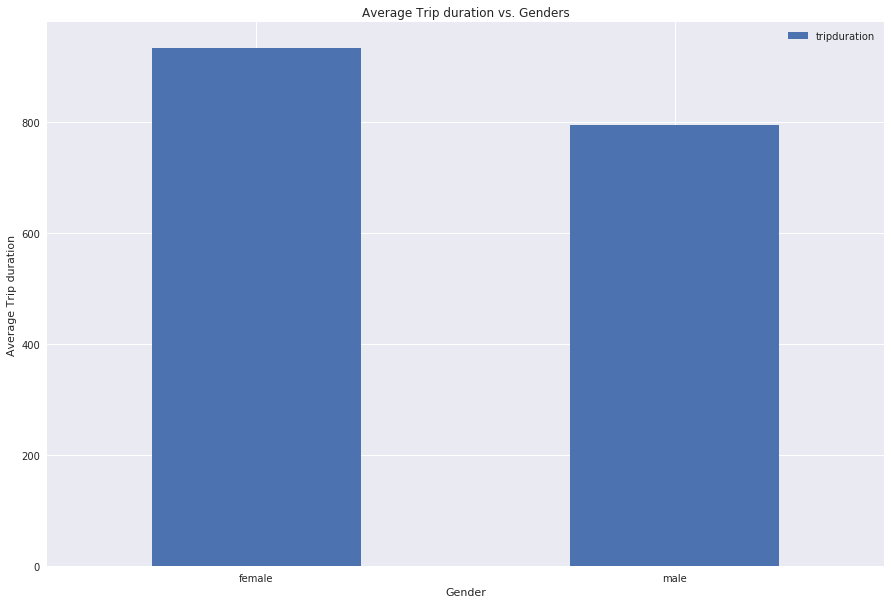

In [110]:
fig = plt.figure(figsize=(8,3))
# df_plot = df[df['gender'] != 0]['gender']
gender_tripduration = df06_plot.groupby(['gender']).mean()
gender_tripduration.plot(kind='bar',rot=360)
plt.grid(b=True)
plt.xlabel('Gender')
plt.ylabel('Average Trip duration')
plt.title('Average Trip duration vs. Genders')

In [97]:
df06_male=df06[df06['gender']==1]
df06_male.describe()

,tripduration,gender
count,9.474640e+05,947464.0
mean,7.955793e+02,1.0
std,4.816823e+03,0.0
min,6.100000e+01,1.0
25%,3.650000e+02,1.0
50%,5.910000e+02,1.0
75%,9.720000e+02,1.0
max,2.167999e+06,1.0


In [98]:
df06_female=df06[df06['gender']==2]
df06_female.describe()

,tripduration,gender
count,3.146180e+05,314618.0
mean,9.335393e+02,2.0
std,5.085720e+03,0.0
min,6.100000e+01,2.0
25%,4.340000e+02,2.0
50%,6.990000e+02,2.0
75%,1.134000e+03,2.0
max,1.595961e+06,2.0


In [101]:
diff_female_male = df06_female.tripduration.mean() - df06_male.tripduration.mean()
if diff_female_male <= 0:
    print("We are done. Null hypothesis is true.")
else:
    print("We need to take a look at the statistical significance before we reject the null hypothesis.")

We need to take a look at the statistical significance before we reject the null hypothesis.


In [102]:
stats.ttest_ind(df06_female['tripduration'], df06_male['tripduration'], equal_var = False)

Ttest_indResult(statistic=13.35598485733091, pvalue=1.1102380985476759e-40)

### interpretion
The T statistics for these two samples are 13.36, while the p-value is 1.1102380985476759e-40 which is actually 0 and p/2 is smaller than our significant level 0.05. The we can reject the null hypothese. The average trip duration of male is higher than than that of female.